In [1]:
import numpy as np
from sklearn.decomposition import PCA
import scipy.io as sio
np.random.seed(7)

In [2]:
Data=sio.loadmat('/content/drive/MyDrive/datasets/Indian_pines_corrected.mat')['indian_pines_corrected']
Label=sio.loadmat('/content/drive/MyDrive/datasets/Indian_pines_gt.mat')['indian_pines_gt']

Data=np.reshape(Data,(Data.shape[0]*Data.shape[1],Data.shape[2]))

Label=np.reshape(Label,(Label.shape[0]*Label.shape[1]))

Labels,counts=np.unique(Label,return_counts=True)

Data=Data[Label>0,:]
Label=Label[Label>0]

Labels,counts=np.unique(Label,return_counts=True)


Labels,counts=np.unique(Label,return_counts=True)

In [3]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(Data)
Data= scaler.transform(Data)

In [4]:
from sklearn.model_selection import train_test_split

testRatio=0.20

X_train, X_test, y_train, y_test = train_test_split(Data, Label, test_size=testRatio, random_state=345,
                                                        stratify=Label)

In [5]:

X_train= scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda=LDA()
X_train=lda.fit_transform(X_train,y_train)
X_test=lda.transform(X_test)

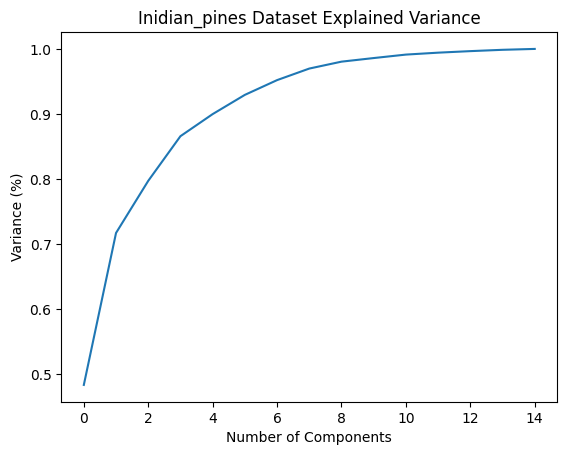

In [8]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(np.cumsum(lda.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Inidian_pines Dataset Explained Variance')
plt.show()


In [9]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
y_pred = clf.predict(X_test)

In [11]:
import pandas as pd
from sklearn import metrics
print("Accuracy :",metrics.accuracy_score(y_pred, y_test)*100)
from sklearn.metrics import cohen_kappa_score
print("Cohen Kappa Score :",cohen_kappa_score(y_pred, y_test)*100)
from sklearn.metrics import confusion_matrix,classification_report
mat = confusion_matrix(y_pred, y_test)
pd.DataFrame(mat)
# print(confusion_matrix(y_test, y_pred ))
print(classification_report(y_test, y_pred ))

Accuracy : 86.39024390243902
Cohen Kappa Score : 84.41944982229265
              precision    recall  f1-score   support

           1       1.00      0.89      0.94         9
           2       0.86      0.84      0.85       286
           3       0.82      0.72      0.76       166
           4       0.79      0.70      0.74        47
           5       0.94      0.96      0.95        97
           6       0.95      0.97      0.96       146
           7       1.00      1.00      1.00         5
           8       0.99      1.00      0.99        96
           9       1.00      1.00      1.00         4
          10       0.84      0.75      0.79       194
          11       0.79      0.87      0.83       491
          12       0.86      0.86      0.86       119
          13       1.00      0.98      0.99        41
          14       0.94      0.96      0.95       253
          15       0.76      0.74      0.75        77
          16       0.95      0.95      0.95        19

    accuracy 